# Analyzing a decade of NHL Hockey

In the last decade a lot has changed in hockey. The game has changed significantly. Not only players are stronger now but the rules have made the game different than it used to be a decade ago.

## Questions to be answered

These are the questions I am going to answer on this notebook:

1. What are the league best player and goalie
1. What are the best scorer players per team
1. What are the players that have most penalty minutes per team
1. Do home teams win more games?
1. What is the most prolific country producing NHL players?
1. Are the best players all coming from Canada?

## Acknowledgements

I cannot thank enough Jeremy Howard from [fast.ai](https://www.fast.ai/) for his incredible tools and tutorials. I borrowed a lot form his libraries.

The Data set was obtained from Kaggle's user [Martin Ellis](https://www.kaggle.com/martinellis). Thanks a ton Martin!! It is super hard to find such quality data for the NHL.



## Loading required libraries

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import squarify
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I add this PATH variable so I don't have to type it every time to load data into pandas.

In [3]:
PATH = '../nhl-game-data/'

Loading the data I am interested

In [4]:
team_info = pd.read_csv(f'{PATH}team_info.csv', low_memory=False)
player_info = pd.read_csv(f'{PATH}player_info.csv', low_memory=False, parse_dates=["birthDate"])
game_skater_stats = pd.read_csv(f'{PATH}game_skater_stats.csv', low_memory=False)
game_goalie_stats = pd.read_csv(f'{PATH}game_goalie_stats.csv', low_memory=False)
game = pd.read_csv(f'{PATH}game.csv', low_memory=False, parse_dates=["date_time", "date_time_GMT"])

This function is borrowed from fast.ai. It lists all the data so we can see it completely in one shot (eliminating the $\dots$ dots) in Jupyter's output.

In [5]:
def display_all(df):
    '''
    INPUT - data frame - pandas dataframe with the data to display
    OUTPUT - 
            display the dataframe with 1,000 rows and columns setting
    '''
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
def display_bar_plot(x, y):
    '''
    INPUT - x and y axis from the datas set to plot
    OUTPUT - 
            display the dataframe's bar plot
    '''
    plt.figure(figsize=(16,6))
    ax = sns.barplot(x=x, y=y, palette='Blues_d')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

## Look at the data

In [7]:
display_all(team_info.tail().T)

,28,29,30,31,32
team_id,22,54,12,53,11
franchiseId,25,38,26,28,35
shortName,Edmonton,Vegas,Carolina,Arizona,Atlanta
teamName,Oilers,Golden Knights,Hurricanes,Coyotes,Thrashers
abbreviation,EDM,VGK,CAR,ARI,ATL
link,/api/v1/teams/22,/api/v1/teams/54,/api/v1/teams/12,/api/v1/teams/53,/api/v1/teams/11


I am going to remove all columns I really don't need for my analysis like *franchiseId* and *link* from the data frame.

In [8]:
team_info.drop(columns=['franchiseId', 'link'], inplace=True)

In [9]:
display_all(player_info.tail().T)

,2404,2405,2406,2407,2408
player_id,8478040,8480011,8480384,8480021,8477352
firstName,Austin,Klim,Alexander,Jack,Ryan
lastName,Poganski,Kostin,True,Studnicka,Fitzgerald
nationality,USA,RUS,DNK,CAN,USA
birthCity,St. Cloud,Penza,Kobenhavn,Windsor,Boca Raton
primaryPosition,RW,C,C,C,C
birthDate,1996-02-16 00:00:00,1999-05-05 00:00:00,1997-07-17 00:00:00,1999-02-18 00:00:00,1994-10-19 00:00:00
link,/api/v1/people/8478040,/api/v1/people/8480011,/api/v1/people/8480384,/api/v1/people/8480021,/api/v1/people/8477352


Again I drop the columns I don't need

In [10]:
player_info.drop(columns=['birthCity', 'link'], inplace=True)

In [11]:
display_all(game_skater_stats.tail().T)

,411573,411574,411575,411576,411577
game_id,2018030417,2018030417,2018030417,2018030417,2018030417
player_id,8475807,8475149,8475745,8478443,8478046
team_id,6,6,6,6,6
timeOnIce,501,1062,913,1006,909
assists,0,0,0,0,0
goals,0,0,0,0,0
shots,1,2,2,1,2
hits,2,0,3,1,0
powerPlayGoals,0,0,0,0,0
powerPlayAssists,0,0,0,0,0


In [12]:
display_all(game_goalie_stats.tail().T)

,24641,24642,24643,24644,24645
game_id,2018030415,2018030416,2018030416,2018030417,2018030417
player_id,8471695,8471695,8476412,8476412,8471695
team_id,6,6,19,19,6
timeOnIce,3522,3600,3487,3600,3394
assists,0,0,0,0,0
goals,0,0,0,0,0
pim,0,0,0,0,0
shots,21,29,31,33,20
saves,19,28,27,32,16
powerPlaySaves,1,12,3,3,0


In [13]:
display_all(game.tail().T)

,11429,11430,11431,11432,11433
game_id,2018030413,2018030414,2018030415,2018030416,2018030417
season,20182019,20182019,20182019,20182019,20182019
type,P,P,P,P,P
date_time,2019-06-02 00:00:00,2019-06-04 00:00:00,2019-06-07 00:00:00,2019-06-10 00:00:00,2019-06-13 00:00:00
date_time_GMT,2019-06-02 00:00:00+00:00,2019-06-04 00:00:00+00:00,2019-06-07 00:00:00+00:00,2019-06-10 00:00:00+00:00,2019-06-13 00:00:00+00:00
away_team_id,6,6,19,6,19
home_team_id,19,19,6,19,6
away_goals,7,2,2,5,4
home_goals,2,4,1,1,1
outcome,away win REG,home win REG,away win REG,away win REG,away win REG


In [14]:
game.drop(columns=['venue_link'], inplace=True)

### Describe the dataframes

I describe the dataframes to get a sense of the information contained inside.

In [15]:
display_all(team_info.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
team_id,33,NaN,NaN,NaN,18.9091,13.7894,1,9,17,25,54
shortName,33,33,Anaheim,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamName,33,32,Coyotes,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbreviation,33,33,NYI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
display_all(player_info.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
player_id,2409,NaN,NaN,NaN,NaT,NaT,8.47399e+06,4659.58,8.44648e+06,8.47127e+06,8.47517e+06,8.47724e+06,8.48149e+06
firstName,2409,703,Ryan,54,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lastName,2409,2045,Smith,12,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,2400,25,CAN,1146,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryPosition,2409,5,D,744,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthDate,2409,2033,1991-01-03 00:00:00,5,1960-10-24,2000-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
display_all(game_skater_stats.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
game_id,411578.0,2.014135e+09,2.609464e+06,2.010020e+09,2.012020e+09,2.014021e+09,2.016021e+09,2.018030e+09
player_id,411578.0,8.472868e+06,4.043732e+03,8.446485e+06,8.470607e+06,8.473933e+06,8.475772e+06,8.481486e+06
team_id,411578.0,1.742942e+01,1.195902e+01,1.000000e+00,8.000000e+00,1.600000e+01,2.400000e+01,5.400000e+01
timeOnIce,411578.0,9.936149e+02,2.978773e+02,1.000000e+00,7.980000e+02,1.001000e+03,1.192000e+03,3.197000e+03
assists,411578.0,2.585707e-01,5.272847e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
goals,411578.0,1.523988e-01,4.044898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
shots,411578.0,1.688545e+00,1.541746e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.500000e+01
hits,411578.0,1.311576e+00,1.461236e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.500000e+01
powerPlayGoals,411578.0,3.290992e-02,1.847043e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
powerPlayAssists,411578.0,6.265155e-02,2.592601e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


In [18]:
display_all(game_goalie_stats.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
game_id,24646,NaN,NaN,NaN,2.01413e+09,2.60929e+06,2.01002e+09,2.01202e+09,2.01402e+09,2.01602e+09,2.01803e+09
player_id,24646,NaN,NaN,NaN,8.47183e+06,4194.51,8.45571e+06,8.47032e+06,8.47172e+06,8.47489e+06,8.48092e+06
team_id,24646,NaN,NaN,NaN,17.4428,11.9427,1,8,16,24,54
timeOnIce,24646,NaN,NaN,NaN,3370.28,735.547,0,3516,3598,3600,6972
assists,24646,NaN,NaN,NaN,0.0211393,0.145534,0,0,0,0,2
goals,24646,NaN,NaN,NaN,0.000121724,0.0110324,0,0,0,0,1
pim,24646,NaN,NaN,NaN,0.0570072,0.47339,0,0,0,0,29
shots,24646,NaN,NaN,NaN,28.0894,8.84034,0,23,29,34,64
saves,24646,NaN,NaN,NaN,25.6558,8.68687,0,21,26,31,60
powerPlaySaves,24646,NaN,NaN,NaN,3.71427,2.99286,0,1,3,5,25


In [19]:
display_all(game.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
game_id,11434,NaN,NaN,NaN,NaN,NaN,2.01413e+09,2.60962e+06,2.01002e+09,2.01202e+09,2.01402e+09,2.01602e+09,2.01803e+09
season,11434,NaN,NaN,NaN,NaN,NaN,2.01431e+07,26098.9,2.0102e+07,2.0122e+07,2.0142e+07,2.0162e+07,2.0182e+07
type,11434,2,R,10642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,11434,1923,2012-03-11 00:00:00,16,2010-10-07 00:00:00,2019-06-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time_GMT,11434,7156,2014-10-11 23:00:00+00:00,9,2010-10-07 16:00:00+00:00,2019-06-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_id,11434,NaN,NaN,NaN,NaN,NaN,17.429,11.9594,1,8,16,24,54
home_team_id,11434,NaN,NaN,NaN,NaN,NaN,17.4292,11.9591,1,8,16,24,54
away_goals,11434,NaN,NaN,NaN,NaN,NaN,2.65917,1.58953,0,1,3,4,10
home_goals,11434,NaN,NaN,NaN,NaN,NaN,2.92933,1.68022,0,2,3,4,10
outcome,11434,6,home win REG,4857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's check the type of each column

I run info() to spot missing data (null values), check what pandas think my data types are and correct them if necesary.

In [20]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
team_id         33 non-null int64
shortName       33 non-null object
teamName        33 non-null object
abbreviation    33 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [21]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 6 columns):
player_id          2409 non-null int64
firstName          2409 non-null object
lastName           2409 non-null object
nationality        2400 non-null object
primaryPosition    2409 non-null object
birthDate          2409 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 113.0+ KB


In [22]:
game_skater_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411578 entries, 0 to 411577
Data columns (total 22 columns):
game_id                 411578 non-null int64
player_id               411578 non-null int64
team_id                 411578 non-null int64
timeOnIce               411578 non-null int64
assists                 411578 non-null int64
goals                   411578 non-null int64
shots                   411578 non-null int64
hits                    411578 non-null int64
powerPlayGoals          411578 non-null int64
powerPlayAssists        411578 non-null int64
penaltyMinutes          411578 non-null int64
faceOffWins             411578 non-null int64
faceoffTaken            411578 non-null int64
takeaways               411578 non-null int64
giveaways               411578 non-null int64
shortHandedGoals        411578 non-null int64
shortHandedAssists      411578 non-null int64
blocked                 411578 non-null int64
plusMinus               411578 non-null int64
evenTimeOnIce  

In [23]:
game_goalie_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24646 entries, 0 to 24645
Data columns (total 19 columns):
game_id                       24646 non-null int64
player_id                     24646 non-null int64
team_id                       24646 non-null int64
timeOnIce                     24646 non-null int64
assists                       24646 non-null int64
goals                         24646 non-null int64
pim                           24646 non-null int64
shots                         24646 non-null int64
saves                         24646 non-null int64
powerPlaySaves                24646 non-null int64
shortHandedSaves              24646 non-null int64
evenSaves                     24646 non-null int64
shortHandedShotsAgainst       24646 non-null int64
evenShotsAgainst              24646 non-null int64
powerPlayShotsAgainst         24646 non-null int64
decision                      22868 non-null object
savePercentage                24607 non-null float64
powerPlaySavePercenta

In [24]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11434 entries, 0 to 11433
Data columns (total 15 columns):
game_id                   11434 non-null int64
season                    11434 non-null int64
type                      11434 non-null object
date_time                 11434 non-null datetime64[ns]
date_time_GMT             11434 non-null datetime64[ns, UTC]
away_team_id              11434 non-null int64
home_team_id              11434 non-null int64
away_goals                11434 non-null int64
home_goals                11434 non-null int64
outcome                   11434 non-null object
home_rink_side_start      11140 non-null object
venue                     11434 non-null object
venue_time_zone_id        11434 non-null object
venue_time_zone_offset    11434 non-null int64
venue_time_zone_tz        11434 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(7), object(6)
memory usage: 1.3+ MB


### Let's address some null values

Players file has some missing data I need to investigate.

In [25]:
player_info[player_info['nationality'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate
1445,8480373,Josef,Korenar,NaN,G,1998-01-31
1548,8480356,Kyle,Keyser,NaN,G,1999-03-08
2009,8479138,Scott,Foster,NaN,G,1982-01-17
2026,8480718,Ben,Wexler,NaN,G,1994-12-23
2079,8479439,Jacob,MacDonald,NaN,D,1993-02-26
2107,8479016,Landon,Bow,NaN,G,1995-08-24
2383,8481481,Blake,Lizotte,NaN,C,1997-12-13
2384,8480363,Kaden,Fulcher,NaN,G,1998-09-23
2386,8480779,Niclas,Westerholm,NaN,G,1997-08-13


A quick google search and I found all these players are mainly prospects so no surprise there is missing infomation about them. 

Scott Foster was Blackhawks contracted emergency goalie. He never suited up for a game during his tenure with the team. Until that luckly night during the 2017-2018 season when all Blackhawks' goalies where injured and he was called out to dress up. He played the "longest 14 minutes of Hockey" of his live as he described it himself in one of the countless interviews he did afterwards.

I manually fixed these are this are not too many.

In [26]:
# Josef Korenar
player_info.at[1445, 'nationality'] = 'CZE'

# Kyle Keyser
player_info.at[1548, 'nationality'] = 'USA'

# Scott Foster
player_info.at[2009, 'nationality'] = 'CAN'

# Ben Wexler
player_info.at[2026, 'nationality'] = 'USA'

# Jacob MacDonald
player_info.at[2079, 'nationality'] = 'USA'

# Landon Bow
player_info.at[2107, 'nationality'] = 'CAN'

# Blake Lizotte
player_info.at[2383, 'nationality'] = 'USA'

# Kaden Fulcher
player_info.at[2384, 'nationality'] = 'CAN'

# Niclas Westerholm
player_info.at[2386, 'nationality'] = 'FIN'

## Merge data with player's, team's and game's information

Now I have to do some table joints (merge in pandas lingo) so I can have the stats and the player's name in one dataframe. Same with the goalies and team names too.

In [27]:
skater = game_skater_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

In [28]:
goalie = game_goalie_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

In [29]:
skater_2 = skater.merge(game, on='game_id', how='left')

In [30]:
skater_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411578 entries, 0 to 411577
Data columns (total 44 columns):
game_id                   411578 non-null int64
player_id                 411578 non-null int64
team_id                   411578 non-null int64
timeOnIce                 411578 non-null int64
assists                   411578 non-null int64
goals                     411578 non-null int64
shots                     411578 non-null int64
hits                      411578 non-null int64
powerPlayGoals            411578 non-null int64
powerPlayAssists          411578 non-null int64
penaltyMinutes            411578 non-null int64
faceOffWins               411578 non-null int64
faceoffTaken              411578 non-null int64
takeaways                 411578 non-null int64
giveaways                 411578 non-null int64
shortHandedGoals          411578 non-null int64
shortHandedAssists        411578 non-null int64
blocked                   411578 non-null int64
plusMinus                

### Drop unnecesary columns and concatenate the player's first and last names

I concatenate the player's firs and last name into one column and drop them as I don't need them anymore moving forward.

In [31]:
skater['fullName'] = skater['firstName'].str.cat(skater['lastName'], sep=' ')

In [32]:
goalie['fullName'] = goalie['firstName'].str.cat(goalie['lastName'], sep=' ')

In [33]:
skater.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [34]:
goalie.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [35]:
skater.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411578 entries, 0 to 411577
Data columns (total 27 columns):
game_id                 411578 non-null int64
timeOnIce               411578 non-null int64
assists                 411578 non-null int64
goals                   411578 non-null int64
shots                   411578 non-null int64
hits                    411578 non-null int64
powerPlayGoals          411578 non-null int64
powerPlayAssists        411578 non-null int64
penaltyMinutes          411578 non-null int64
faceOffWins             411578 non-null int64
faceoffTaken            411578 non-null int64
takeaways               411578 non-null int64
giveaways               411578 non-null int64
shortHandedGoals        411578 non-null int64
shortHandedAssists      411578 non-null int64
blocked                 411578 non-null int64
plusMinus               411578 non-null int64
evenTimeOnIce           411578 non-null int64
shortHandedTimeOnIce    411578 non-null int64
powerPlayTimeOn

In [36]:
goalie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24646 entries, 0 to 24645
Data columns (total 24 columns):
game_id                       24646 non-null int64
timeOnIce                     24646 non-null int64
assists                       24646 non-null int64
goals                         24646 non-null int64
pim                           24646 non-null int64
shots                         24646 non-null int64
saves                         24646 non-null int64
powerPlaySaves                24646 non-null int64
shortHandedSaves              24646 non-null int64
evenSaves                     24646 non-null int64
shortHandedShotsAgainst       24646 non-null int64
evenShotsAgainst              24646 non-null int64
powerPlayShotsAgainst         24646 non-null int64
decision                      22868 non-null object
savePercentage                24607 non-null float64
powerPlaySavePercentage       22237 non-null float64
evenStrengthSavePercentage    24590 non-null float64
nationality      

In [37]:
print("Min season: {}\nMax season: {}".format(str(game['season'].min()), str(game['season'].max())))

Min season: 20102011
Max season: 20182019


## Best NHL Hockey players of the decade (2010-2019)

### What are the league's best 10 players?

As we saw before, there are some prospect players that have made it to some matchs. Later on (when I analized goalies) I saw none of the best goalies from the league in the top 10! It ended up being these prospects (like Scott Foster who playes 14 minutes and received zero goals, a 100% save percentage!) that have very few minutes but high save percentages.

To take care of this I had some alternatives:

**Eliminate all goalies with 100% save percentage**

This alternative is not fear to seasoned goalies, and players in general. Veteran goalie players enter the rink to replace the starting goalie when have already received 3-4 goals. So they deserve the good save percenatge. 

**Determine a minimum number of seasons to be considered**

Also has some issues as thsi arises the question of: what does make the minumum number of seasons correct? In despite thsi concern I have selected this option. I have cose a minimum of 5 seasons and an average of 81 games per season (41 in home ice and 41 as away).

In [38]:
min_seasons_played = 5
games_per_season = 81

min_games = min_seasons_played * games_per_season

In [39]:
top_10_skaters = skater[['game_id','teamName','fullName','primaryPosition', 'timeOnIce','penaltyMinutes', 'goals']]\
    .groupby(['teamName','fullName', 'primaryPosition'], as_index=False)\
    .agg({'game_id':'count', 'goals':'sum', 'timeOnIce':'mean', 'penaltyMinutes':'sum'})\

In [40]:
top_10_skaters.head()

,teamName,fullName,primaryPosition,game_id,goals,timeOnIce,penaltyMinutes
0,Avalanche,A.J. Greer,LW,37,1,467.000000,47
1,Avalanche,Aaron Palushaj,RW,25,2,678.920000,8
2,Avalanche,Adam Foote,D,47,0,1075.510638,33
3,Avalanche,Alex Tanguay,LW,148,30,1038.567568,68
4,Avalanche,Alexander Kerfoot,C,175,36,852.382857,74


Renaming columns and doing some calculations.

In [41]:
top_10_skaters.columns = ['team_name','player_name', 'position', 'games_played','total_goals','avg_time_on_ice', 'total_penalty_minutes']

In [42]:
# Let's convert the time on ice from seconds to minutes
top_10_skaters['avg_time_on_ice'] = top_10_skaters['avg_time_on_ice'] / 60

In [43]:
# Let's compute the Goals per game (gpg) to normalize the data
top_10_skaters['gpg'] = top_10_skaters['total_goals'] / top_10_skaters['games_played']

# Let's see also how goals relate to time on ice (toi)
top_10_skaters['goals_toi'] = top_10_skaters['total_goals'] / (top_10_skaters['avg_time_on_ice'])

# Total penalty minutes per game
top_10_skaters['penalty_minutes_per_game'] = top_10_skaters['total_penalty_minutes'] / (top_10_skaters['games_played'])

# Now we look at the top 10 players appliying the minimum games played in the league
top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)

,team_name,player_name,position,games_played,total_goals,avg_time_on_ice,total_penalty_minutes,gpg,goals_toi,penalty_minutes_per_game
905,Capitals,Alex Ovechkin,LW,788,434,20.322335,449,0.550761,21.355814,0.569797
2224,Lightning,Steven Stamkos,C,655,342,19.783257,438,0.522137,17.287346,0.668702
2779,Penguins,Sidney Crosby,C,674,299,20.708457,345,0.443620,14.438546,0.511869
2713,Penguins,Evgeni Malkin,C,643,282,19.411068,697,0.438569,14.527794,1.083981
3620,Stars,Tyler Seguin,C,489,211,19.783299,139,0.431493,10.665562,0.284254
488,Blues,Vladimir Tarasenko,RW,567,244,17.735126,151,0.430335,13.758007,0.266314
1882,Islanders,John Tavares,C,611,259,20.342280,297,0.423895,12.732103,0.486088
2207,Lightning,Nikita Kucherov,RW,512,217,17.869824,274,0.423828,12.143376,0.535156
221,Blackhawks,Patrick Kane,RW,748,311,20.562901,268,0.415775,15.124325,0.358289
705,Canadiens,Max Pacioretty,LW,578,230,18.491378,327,0.397924,12.438229,0.565744


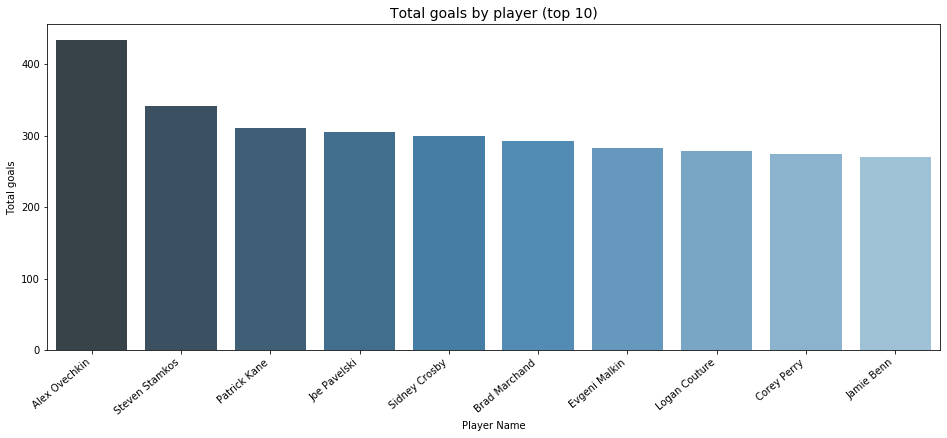

In [44]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('total_goals', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('total_goals', ascending=False).head(10)['total_goals']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Total goals')
plt.title('Total goals by player (top 10)', fontsize=14)
plt.show()

In [45]:
top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('total_goals', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','total_goals']]

,team_name,player_name,position,games_played,total_goals
905,Capitals,Alex Ovechkin,LW,788,434
2224,Lightning,Steven Stamkos,C,655,342
221,Blackhawks,Patrick Kane,RW,748,311
3456,Sharks,Joe Pavelski,C,782,305
2779,Penguins,Sidney Crosby,C,674,299
504,Bruins,Brad Marchand,LW,769,292
2713,Penguins,Evgeni Malkin,C,643,282
3467,Sharks,Logan Couture,C,739,279
1323,Ducks,Corey Perry,RW,690,274
3553,Stars,Jamie Benn,LW,695,270


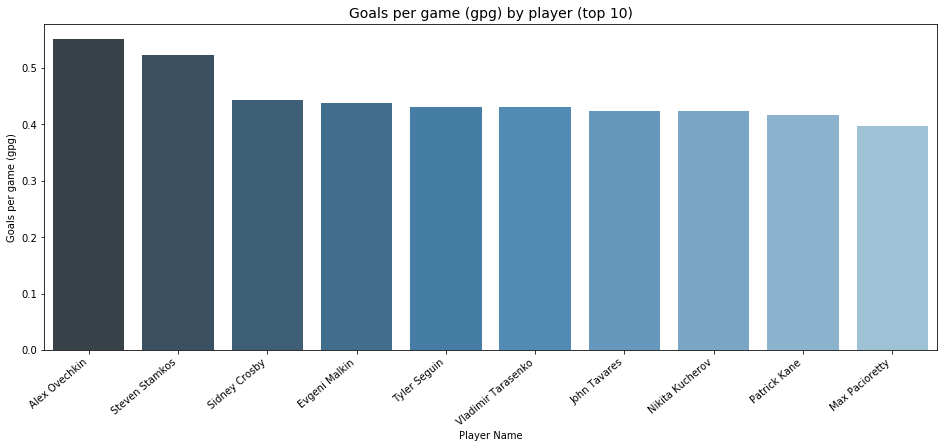

In [46]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)['gpg']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Goals per game (gpg)')
plt.title('Goals per game (gpg) by player (top 10)', fontsize=14)
plt.show()

In [47]:
top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','gpg']]

,team_name,player_name,position,games_played,gpg
905,Capitals,Alex Ovechkin,LW,788,0.550761
2224,Lightning,Steven Stamkos,C,655,0.522137
2779,Penguins,Sidney Crosby,C,674,0.443620
2713,Penguins,Evgeni Malkin,C,643,0.438569
3620,Stars,Tyler Seguin,C,489,0.431493
488,Blues,Vladimir Tarasenko,RW,567,0.430335
1882,Islanders,John Tavares,C,611,0.423895
2207,Lightning,Nikita Kucherov,RW,512,0.423828
221,Blackhawks,Patrick Kane,RW,748,0.415775
705,Canadiens,Max Pacioretty,LW,578,0.397924


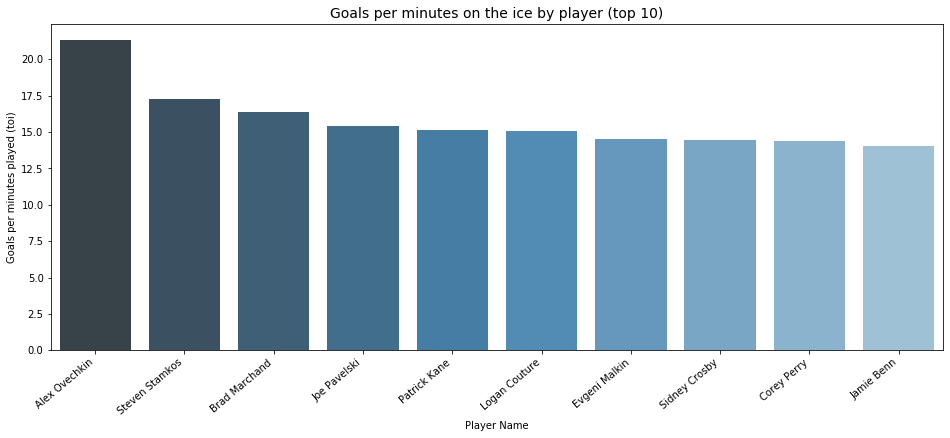

In [48]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('goals_toi', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('goals_toi', ascending=False).head(10)['goals_toi']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Goals per minutes played (toi)')
plt.title('Goals per minutes on the ice by player (top 10)', fontsize=14)
plt.show()

In [49]:
top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('goals_toi', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','goals_toi']]

,team_name,player_name,position,games_played,goals_toi
905,Capitals,Alex Ovechkin,LW,788,21.355814
2224,Lightning,Steven Stamkos,C,655,17.287346
504,Bruins,Brad Marchand,LW,769,16.356160
3456,Sharks,Joe Pavelski,C,782,15.418479
221,Blackhawks,Patrick Kane,RW,748,15.124325
3467,Sharks,Logan Couture,C,739,15.069067
2713,Penguins,Evgeni Malkin,C,643,14.527794
2779,Penguins,Sidney Crosby,C,674,14.438546
1323,Ducks,Corey Perry,RW,690,14.359696
3553,Stars,Jamie Benn,LW,695,14.032040


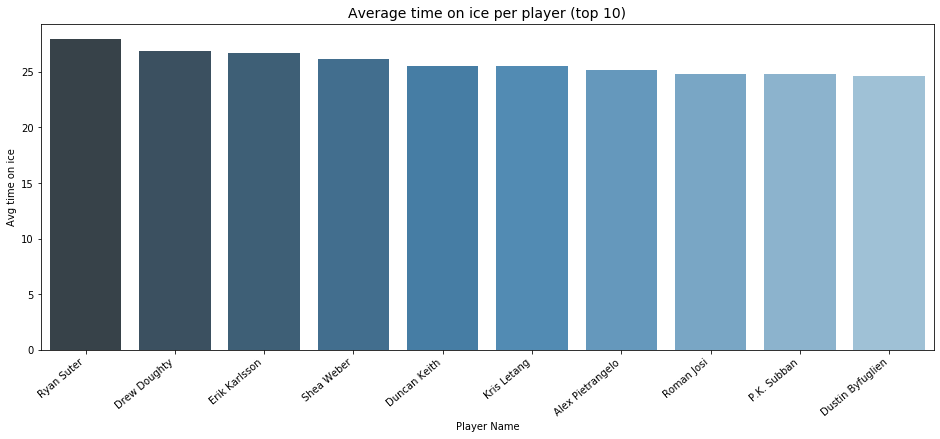

In [50]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['avg_time_on_ice']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice')
plt.title('Average time on ice per player (top 10)', fontsize=14)
plt.show()

In [51]:
top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','avg_time_on_ice']]

,team_name,player_name,position,games_played,avg_time_on_ice
3770,Wild,Ryan Suter,D,570,27.925760
2067,Kings,Drew Doughty,D,767,26.853086
3337,Senators,Erik Karlsson,D,609,26.642173
2908,Predators,Shea Weber,D,481,26.142793
171,Blackhawks,Duncan Keith,D,760,25.545263
2738,Penguins,Kris Letang,D,610,25.517842
390,Blues,Alex Pietrangelo,D,754,25.139567
2896,Predators,Roman Josi,D,634,24.796504
725,Canadiens,P.K. Subban,D,473,24.791261
1974,Jets,Dustin Byfuglien,D,555,24.582162


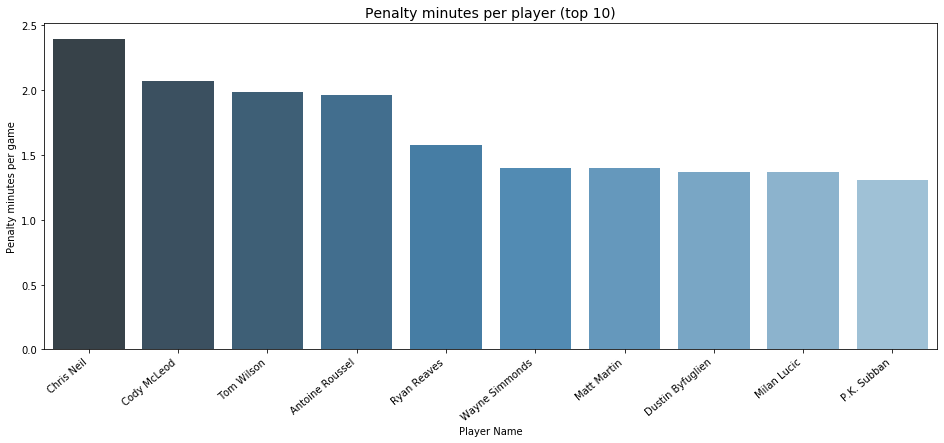

In [52]:
x = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('penalty_minutes_per_game', ascending=False).head(10)['player_name']
y = top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('penalty_minutes_per_game', ascending=False).head(10)['penalty_minutes_per_game']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Penalty minutes per game')
plt.title('Penalty minutes per player (top 10)', fontsize=14)
plt.show()

In [53]:
top_10_skaters[top_10_skaters['games_played'] > min_games].sort_values('penalty_minutes_per_game', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','penalty_minutes_per_game']]

,team_name,player_name,position,games_played,penalty_minutes_per_game
3305,Senators,Chris Neil,RW,468,2.397436
27,Avalanche,Cody McLeod,LW,464,2.071121
998,Capitals,Tom Wilson,RW,523,1.986616
3518,Stars,Antoine Roussel,LW,432,1.965278
471,Blues,Ryan Reaves,RW,455,1.578022
1678,Flyers,Wayne Simmonds,RW,614,1.402280
1906,Islanders,Matt Martin,LW,532,1.400376
1974,Jets,Dustin Byfuglien,D,555,1.371171
580,Bruins,Milan Lucic,LW,433,1.367206
725,Canadiens,P.K. Subban,D,473,1.306554


### What are the league's best 10 goalies?

In [54]:
goalie.head()

,game_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,...,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,nationality,primaryPosition,birthDate,shortName,teamName,abbreviation,fullName
0,2011030221,3876,0,0,0,36,32,7,0,25,...,88.888889,87.5,89.285714,CAN,G,1972-05-06,New Jersey,Devils,NJD,Martin Brodeur
1,2011030221,3876,0,0,0,26,23,4,5,14,...,88.461538,80.0,87.500000,RUS,G,1980-06-22,Philadelphia,Flyers,PHI,Ilya Bryzgalov
2,2011030222,3599,0,0,0,20,19,1,3,15,...,95.000000,100.0,93.750000,CAN,G,1972-05-06,New Jersey,Devils,NJD,Martin Brodeur
3,2011030222,3559,0,0,0,34,31,6,0,25,...,91.176471,100.0,89.285714,RUS,G,1980-06-22,Philadelphia,Flyers,PHI,Ilya Bryzgalov
4,2011030223,4623,0,0,0,31,27,1,1,25,...,87.096774,50.0,89.285714,RUS,G,1980-06-22,Philadelphia,Flyers,PHI,Ilya Bryzgalov


In [60]:
top_10_goalies = goalie[['game_id','teamName','fullName','timeOnIce','savePercentage', 'shortHandedSaves']]\
    .groupby(['teamName','fullName'], as_index=False)\
    .agg({'game_id':'count', 'savePercentage':'mean', 'timeOnIce':'mean', 'shortHandedSaves':'mean'})\

In [61]:
top_10_goalies.head()

,teamName,fullName,game_id,savePercentage,timeOnIce,shortHandedSaves
0,Avalanche,Andrew Hammond,4,94.550915,2937.750000,1.000000
1,Avalanche,Brian Elliott,12,88.608656,3450.833333,0.583333
2,Avalanche,Calvin Pickard,86,90.634598,3279.627907,0.651163
3,Avalanche,Craig Anderson,33,88.653266,3291.454545,0.606061
4,Avalanche,Jean-Sebastien Giguere,72,91.317463,3282.708333,0.500000


In [62]:
top_10_goalies.columns = ['team_name','player_name','games_played','avg_save_percentage','avg_time_on_ice', 'avg_short_handed_saves']

In [63]:
# Let's convert the time on ice from seconds to minutes
top_10_goalies['avg_time_on_ice'] = top_10_goalies['avg_time_on_ice'] / 60

In [64]:
top_10_goalies.head()

,team_name,player_name,games_played,avg_save_percentage,avg_time_on_ice,avg_short_handed_saves
0,Avalanche,Andrew Hammond,4,94.550915,48.962500,1.000000
1,Avalanche,Brian Elliott,12,88.608656,57.513889,0.583333
2,Avalanche,Calvin Pickard,86,90.634598,54.660465,0.651163
3,Avalanche,Craig Anderson,33,88.653266,54.857576,0.606061
4,Avalanche,Jean-Sebastien Giguere,72,91.317463,54.711806,0.500000


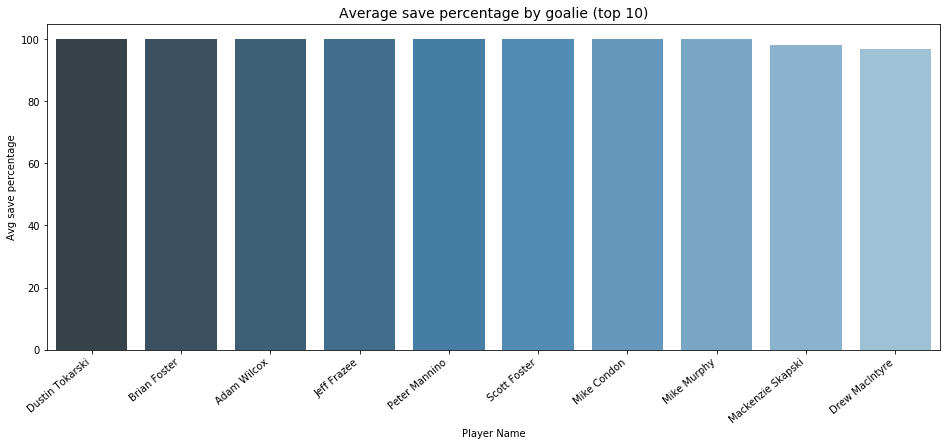

In [65]:
x = top_10_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['player_name']
y = top_10_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['avg_save_percentage']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.title('Average save percentage by goalie (top 10)', fontsize=14)
plt.show()

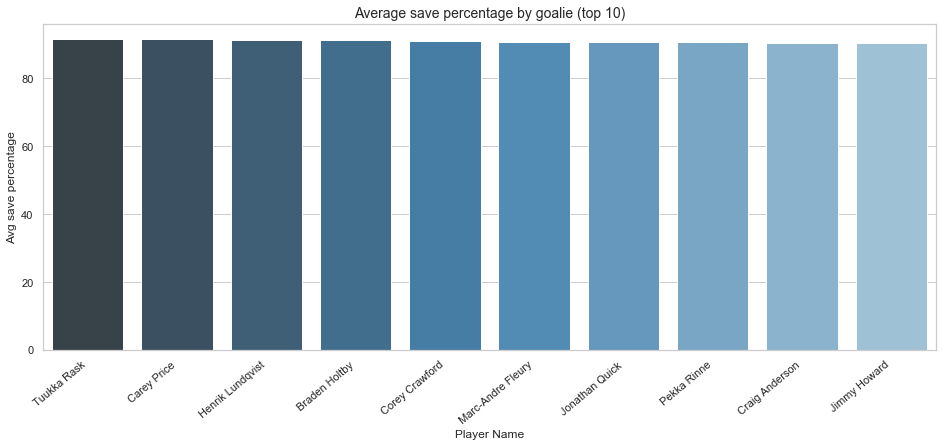

In [85]:
x = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage', ascending=False).head(10)['player_name']
y = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage', ascending=False).head(10)['avg_save_percentage']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.title('Average save percentage by goalie (top 10)', fontsize=14)
plt.show()

In [68]:
top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage', ascending=False).head(10)[['team_name','player_name','games_played','avg_save_percentage']]

,team_name,player_name,games_played,avg_save_percentage
61,Bruins,Tuukka Rask,521,91.556748
67,Canadiens,Carey Price,531,91.497122
314,Rangers,Henrik Lundqvist,617,91.322216
82,Capitals,Braden Holtby,509,91.225530
20,Blackhawks,Corey Crawford,526,91.070437
294,Penguins,Marc-Andre Fleury,442,90.812083
225,Kings,Jonathan Quick,562,90.810004
308,Predators,Pekka Rinne,593,90.776247
352,Senators,Craig Anderson,441,90.580939
321,Red Wings,Jimmy Howard,480,90.291479


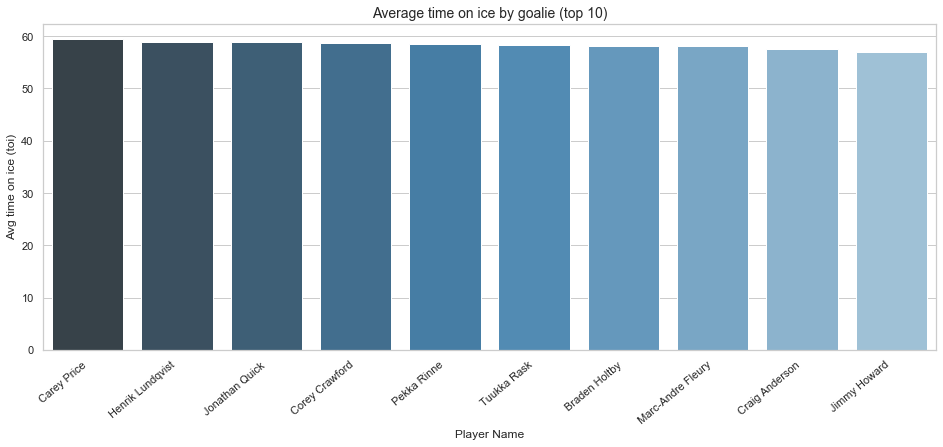

In [86]:
x = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['player_name']
y = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)['avg_time_on_ice']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice (toi)')
plt.title('Average time on ice by goalie (top 10)', fontsize=14)
plt.show()

In [70]:
top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_time_on_ice', ascending=False).head(10)[['team_name','player_name','games_played','avg_time_on_ice']]

,team_name,player_name,games_played,avg_time_on_ice
67,Canadiens,Carey Price,531,59.423760
314,Rangers,Henrik Lundqvist,617,58.916397
225,Kings,Jonathan Quick,562,58.882918
20,Blackhawks,Corey Crawford,526,58.748289
308,Predators,Pekka Rinne,593,58.564193
61,Bruins,Tuukka Rask,521,58.291043
82,Capitals,Braden Holtby,509,58.183694
294,Penguins,Marc-Andre Fleury,442,58.134201
352,Senators,Craig Anderson,441,57.631897
321,Red Wings,Jimmy Howard,480,56.937222


In [71]:
# Let's see also how avg_save_percentage relate to time on ice (toi)
top_10_goalies['avg_save_percentage_by_toi'] = top_10_goalies['avg_save_percentage'] / (top_10_goalies['avg_time_on_ice'])

# Now we look at the top 10 players
top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage', ascending=False).head(10)

,team_name,player_name,games_played,avg_save_percentage,avg_time_on_ice,avg_short_handed_saves,avg_save_percentage_by_toi
61,Bruins,Tuukka Rask,521,91.556748,58.291043,0.687140,1.570683
67,Canadiens,Carey Price,531,91.497122,59.423760,0.821092,1.539740
314,Rangers,Henrik Lundqvist,617,91.322216,58.916397,0.732577,1.550031
82,Capitals,Braden Holtby,509,91.225530,58.183694,0.730845,1.567888
20,Blackhawks,Corey Crawford,526,91.070437,58.748289,0.579848,1.550180
294,Penguins,Marc-Andre Fleury,442,90.812083,58.134201,0.680995,1.562111
225,Kings,Jonathan Quick,562,90.810004,58.882918,0.633452,1.542213
308,Predators,Pekka Rinne,593,90.776247,58.564193,0.569983,1.550030
352,Senators,Craig Anderson,441,90.580939,57.631897,0.775510,1.571715
321,Red Wings,Jimmy Howard,480,90.291479,56.937222,0.683333,1.585808


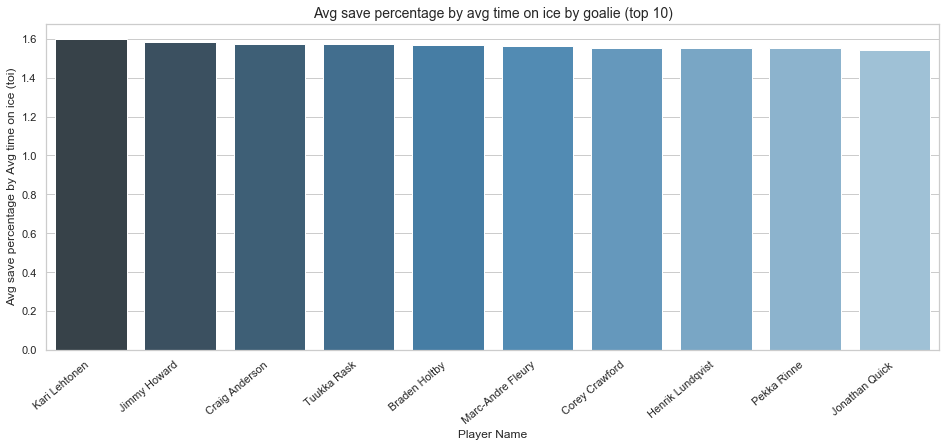

In [87]:
x = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage_by_toi', ascending=False).head(10)['player_name']
y = top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage_by_toi', ascending=False).head(10)['avg_save_percentage_by_toi']
display_bar_plot(x, y)
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage by Avg time on ice (toi)')
plt.title('Avg save percentage by avg time on ice by goalie (top 10)', fontsize=14)
plt.show()

In [73]:
top_10_goalies[top_10_goalies['games_played'] > min_games].sort_values('avg_save_percentage_by_toi', ascending=False).head(10)[['team_name','player_name','games_played','avg_save_percentage_by_toi']]

,team_name,player_name,games_played,avg_save_percentage_by_toi
382,Stars,Kari Lehtonen,450,1.597704
321,Red Wings,Jimmy Howard,480,1.585808
352,Senators,Craig Anderson,441,1.571715
61,Bruins,Tuukka Rask,521,1.570683
82,Capitals,Braden Holtby,509,1.567888
294,Penguins,Marc-Andre Fleury,442,1.562111
20,Blackhawks,Corey Crawford,526,1.550180
314,Rangers,Henrik Lundqvist,617,1.550031
308,Predators,Pekka Rinne,593,1.550030
225,Kings,Jonathan Quick,562,1.542213


## What are the best scorers per team?

In [90]:
skater_reindexed = top_10_skaters[['total_goals', 'team_name', 'player_name']].groupby(['team_name', 'player_name']).agg({'total_goals':'sum'})\
                                         .sort_values(by=['team_name', 'total_goals'], ascending=[True, False])\
                                         .reset_index(drop=False)

In [91]:
top_3_per_team = skater_reindexed.groupby(['team_name']).head(3)

In [92]:
indice = top_3_per_team['team_name'] + ' - ' + top_3_per_team['player_name']

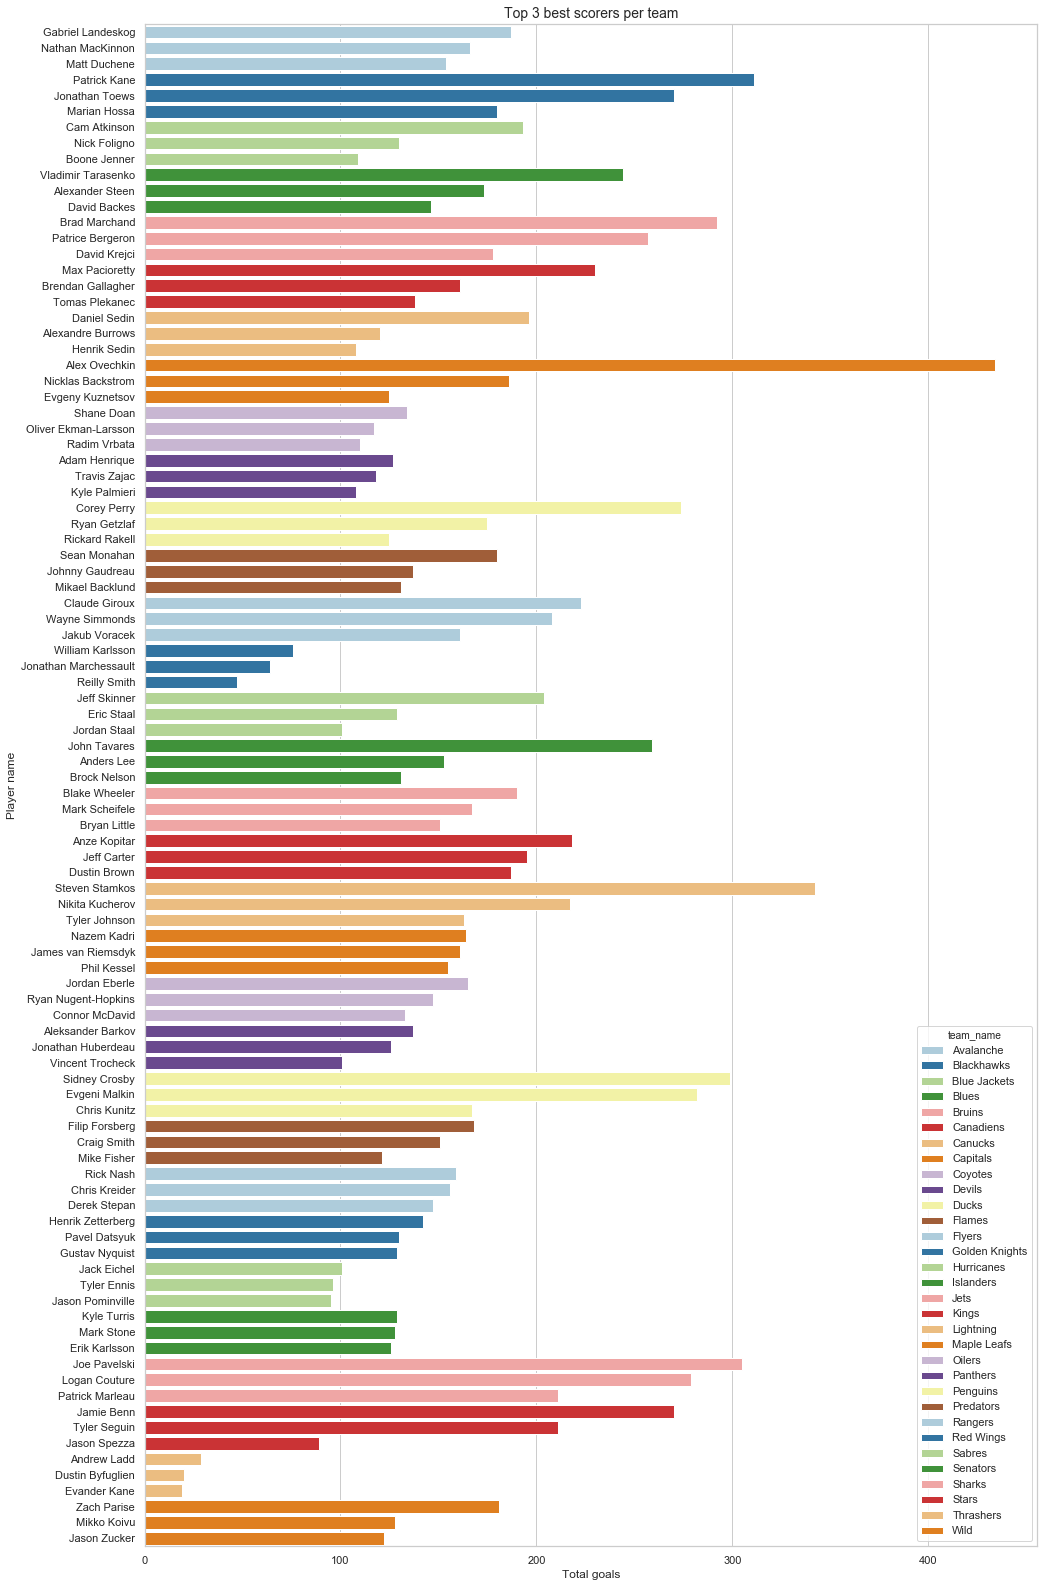

In [94]:
sns.set(rc={'figure.figsize':(16,28)})
sns.set(style="whitegrid")
sns.barplot(x='total_goals', y='player_name', hue='team_name', data=top_3_per_team, palette='Paired', dodge=False);
plt.xlabel('Total goals')
plt.ylabel('Player name')
plt.title('Top 3 best scorers per team', fontsize=14)
plt.show()

### Do home teams win more games?

In [127]:
x = game[game['outcome'].str.contains('REG')]['outcome'].value_counts()

In [128]:
y = game[game['outcome'].str.contains('REG')]['outcome'].value_counts().index

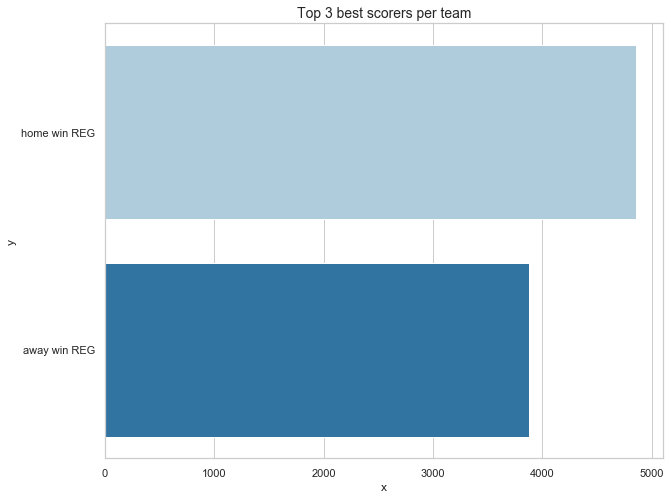

In [129]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="whitegrid")
sns.barplot(x=x, y=y, palette='Paired', dodge=False);
plt.xlabel('x')
plt.title('Top 3 best scorers per team', fontsize=14)
plt.show()

In [104]:
game[game['outcome'].str.contains('OT')]['outcome'].value_counts()

home win OT    791
away win OT    734
Name: outcome, dtype: int64

In [105]:
game[game['outcome'].str.contains('SO')]['outcome'].value_counts()

away win SO    591
home win SO    580
Name: outcome, dtype: int64

home win REG    4857
away win REG    3881
home win OT      791
away win OT      734
away win SO      591
home win SO      580
Name: outcome, dtype: int64

In [102]:
4857+3881

8738

In [106]:
game[game['outcome'].str.contains('SO')]['outcome'].value_counts().index

Index(['away win SO', 'home win SO'], dtype='object')

In [110]:
game[game['outcome'].str.contains('SO')]['outcome'].value_counts().items

<bound method Series.items of away win SO    591
home win SO    580
Name: outcome, dtype: int64>

### What is the most prolific country producing NHL players?

In [79]:
players_per_country = player_info['nationality'].value_counts().to_frame().reset_index(drop=False)

In [80]:
players_per_country.columns = ['Country', 'Number_players']

In [81]:
players_per_country

,Country,Number_players
0,CAN,1149
1,USA,651
2,SWE,184
3,FIN,101
4,RUS,99
5,CZE,97
6,SVK,25
7,CHE,24
8,DEU,20
9,DNK,14


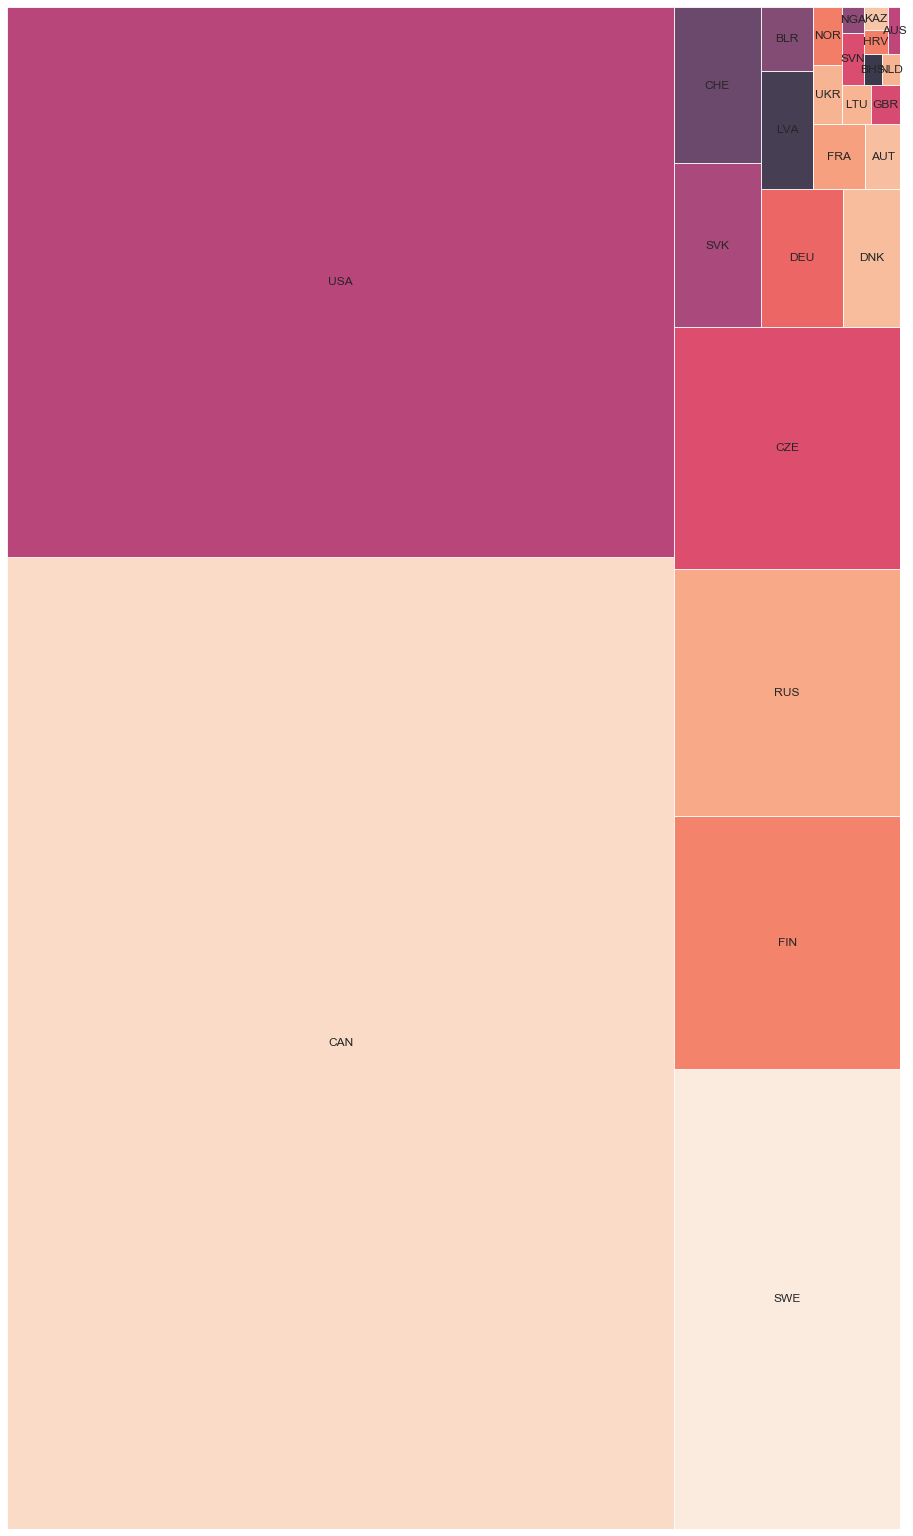

In [82]:
squarify.plot(sizes=players_per_country['Number_players'], label=players_per_country['Country'] , alpha=.8 )
plt.axis('off')
plt.show()

## Some plots I use to get an idea of the data

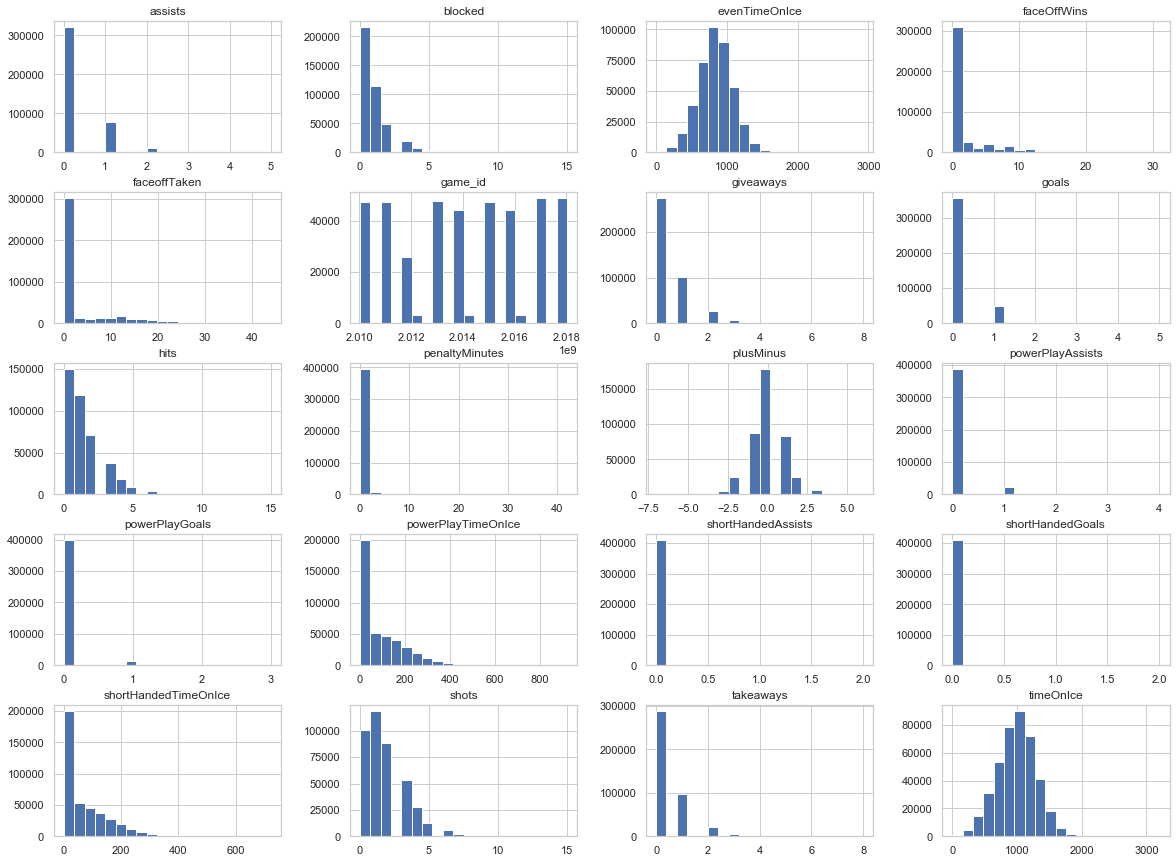

In [83]:
skater.hist(bins=20, figsize=(20, 15));